In [1]:
# **Importation des packages et Data Set**

In [88]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import pickle
import math
import scipy
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from scikitplot.metrics import plot_roc_curve as auc_roc

In [89]:
data=pd.read_csv("tested.csv")
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [90]:
#Comme les colonnes "Passengerid","Name","Ticket"et"Cabin" n'ont pas d'influence
#sur l'analyse et la variable a prédire on va les supprimer.
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [49]:
data.rename(columns={'SibSp':'NbSib'}, inplace=True)

In [50]:
#La taille de la base de données 
data.shape

(418, 8)

In [51]:
# vérifier s'il existe des données en double
data.duplicated().sum()

38

In [52]:
# Eliminer les lignes en double
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [53]:
# voir les informations de chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  380 non-null    int64  
 1   Pclass    380 non-null    int64  
 2   Sex       380 non-null    object 
 3   Age       322 non-null    float64
 4   NbSib     380 non-null    int64  
 5   Parch     380 non-null    int64  
 6   Fare      379 non-null    float64
 7   Embarked  380 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.7+ KB


In [54]:
# afficher les statistiques descriptives pour les données numériques avant d'effectuer les changements
data.describe()

,Survived,Pclass,Age,NbSib,Parch,Fare
count,380.000000,380.000000,322.000000,380.000000,380.000000,379.000000
mean,0.378947,2.218421,30.324534,0.484211,0.431579,38.152946
std,0.485765,0.851618,14.370820,0.925889,1.021176,58.020997
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,2.000000,27.500000,0.000000,0.000000,15.245800
75%,1.000000,3.000000,39.750000,1.000000,0.000000,36.877100
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [55]:
# afficher les statistiques descriptives pour données catégorielles avant d'effectuer les changements
data.describe(include=['object'])

,Sex,Embarked
count,380,380
unique,2,3
top,male,S
freq,236,250


In [56]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         58
NbSib        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [57]:
data.loc[:,'Age'] = data.loc[:,'Age'].replace(np.nan,round(mean(data.Age),1))
data.dropna(inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
NbSib       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [58]:
#Exploratory data analysis

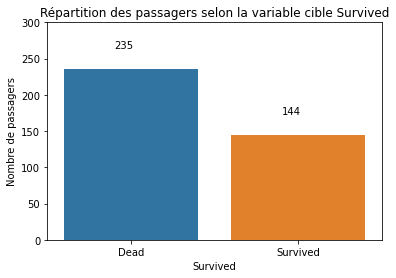

In [59]:
# voir la répartition des clients selon la variable Survived

ax = sns.countplot(x="Survived", data=data)

plt.title('Répartition des passagers selon la variable cible Survived')
plt.xlabel("Survived")
plt.ylabel("Nombre de passagers")
plt.ylim(0,300)
plt.xticks([0,1], ['Dead', 'Survived'])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+30))


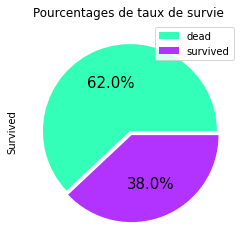

In [60]:
data['Survived'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['#33FFB8','#B233FF'], explode = [0,0.05], textprops = {"fontsize":15})

plt.title('Pourcentages de taux de survie ')
plt.legend(labels=['dead', 'survived'])


In [61]:
#d'après les deux graphes on peut constater un déséquilibre ,  on remarque que 62% des passagers (235) n'ont pas survécu et
#que 38% (144) qui ont survécu


In [62]:
#visualizer les variables quantitatives
categorical=["Sex","Embarked"]

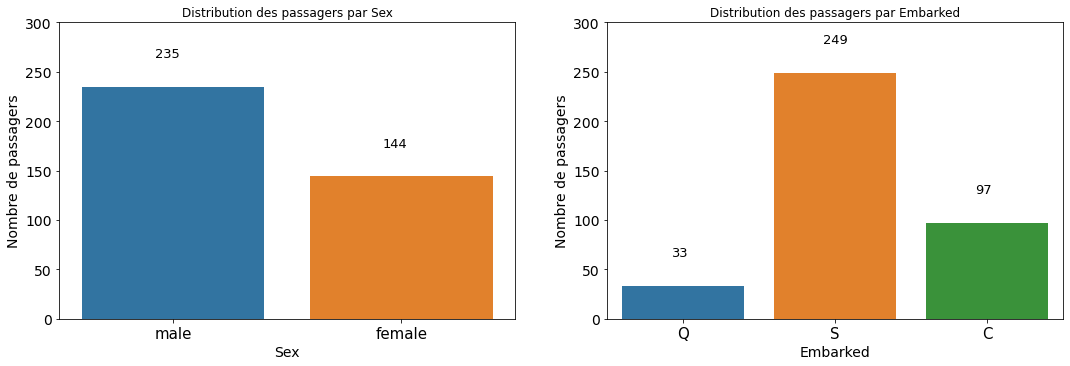

In [63]:
plt.figure(figsize=(18,12))

for i,col in enumerate(categorical):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = data, x = col)

    plt.title('Distribution des passagers par ' + col)
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Nombre de passagers", fontsize= 14)
    plt.ylim(0,300)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+30), fontsize= 13)

plt.show()

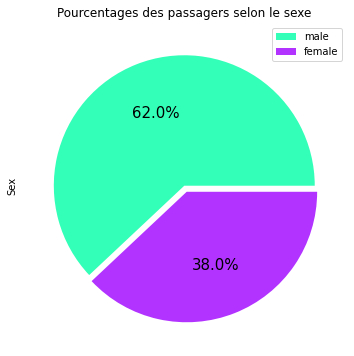

In [64]:
#taux de répartition selon le sex
plt.figure(figsize=(10,6))

data['Sex'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['#33FFB8', '#B233FF'], explode = [0,0.05], textprops = {"fontsize":15})
plt.title('Pourcentages des passagers selon le sexe')
plt.legend(labels=['male', 'female'])

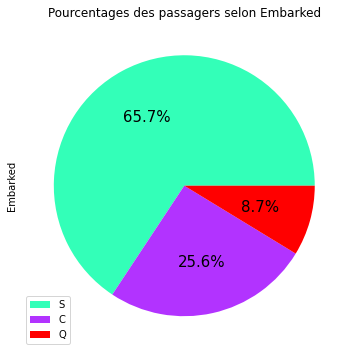

In [65]:
#taux de répartition selon Embarked
plt.figure(figsize=(10,6))

data['Embarked'].value_counts().plot(kind='pie',labels = ['','',''], autopct='%1.1f%%', colors = ['#33FFB8', '#B233FF',"red"], textprops = {"fontsize":15})
plt.title('Pourcentages des passagers selon Embarked')
plt.legend(labels=['S', 'C',"Q"])

In [66]:
#En visualizant les deux variables quantitatives on remarque aussi un déséquilibre pour le sexe 62% ( 235 ) sont des hommes
#et que 38% (144) sont des femmes .Pour la variable embarked la classe S domine 65.7%

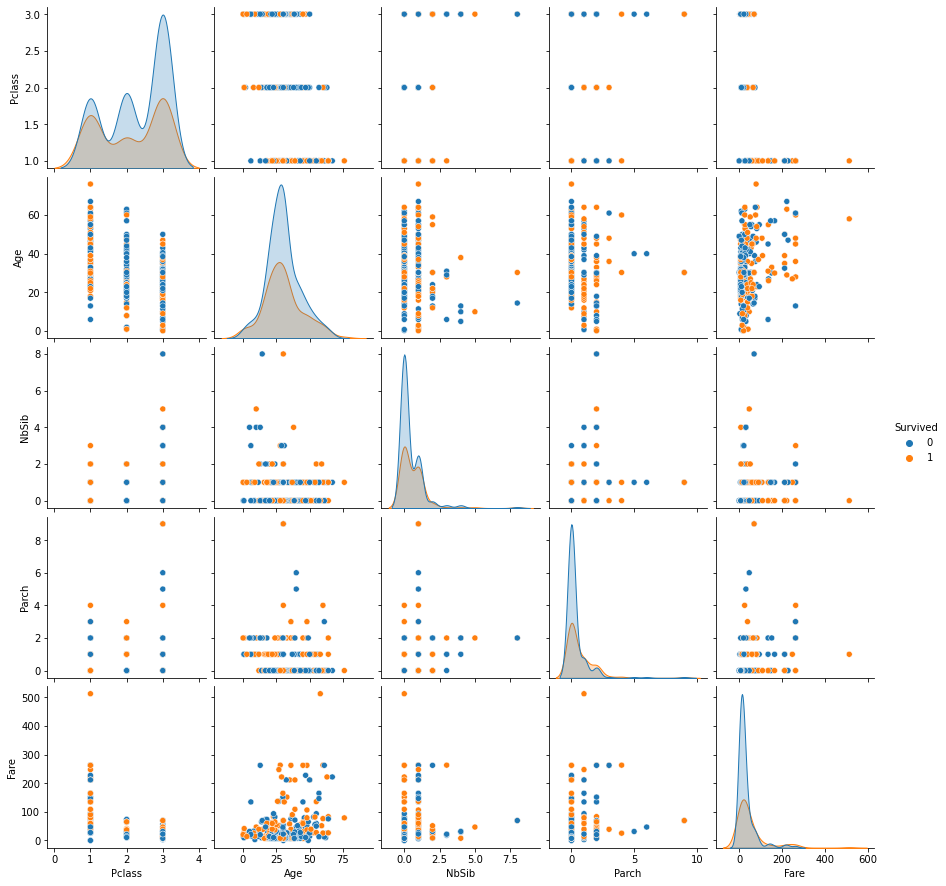

In [67]:
# voir l'impact du Survived sur les colonnes numériques
sns.pairplot(data, hue='Survived')

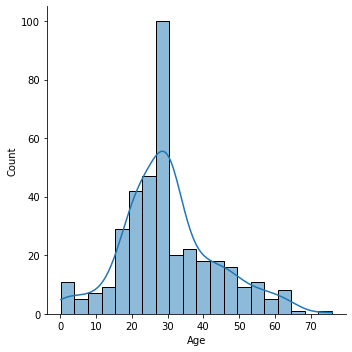

In [68]:
#voir la distribution de l'age
sns.displot(data, x="Age",kde=True)


In [69]:
#l'age semble etre normalement distribué

<AxesSubplot:>

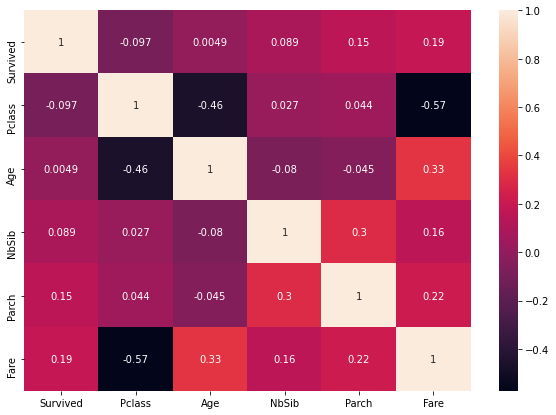

In [70]:
#Correlation
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(method='pearson'),annot=True)

In [71]:
#il n'ya pas de forte correlation entre les variables , on peut remarquer qu'il y'a une relation entre Pclass et Fare ,Age et Pclass
#pour notre variable Survived il peut y avoir une relation avec Parch et Fare d'après le plot

In [74]:
data

,Survived,Pclass,Sex,Age,NbSib,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
411,1,1,female,37.0,1,0,90.0000,Q
412,1,3,female,28.0,0,0,7.7750,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S


In [75]:
#Standarisation 

In [76]:
dummy_cols = [  # Columns to one-hot encode
    'Embarked','Pclass','NbSib','Parch'
    ]
datafinal = pd.get_dummies(data, columns=dummy_cols)

In [77]:
datafinal

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,NbSib_5,NbSib_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,male,34.5,7.8292,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,female,47.0,7.0000,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,male,62.0,9.6875,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,male,27.0,8.6625,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,female,22.0,12.2875,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,1,female,37.0,90.0000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
412,1,female,28.0,7.7750,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
414,1,female,39.0,108.9000,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
415,0,male,38.5,7.2500,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [78]:
datafinal['Sex']=datafinal['Sex'].replace('male',1)
datafinal['Sex']=datafinal['Sex'].replace('female',0)

In [79]:
datafinal

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,NbSib_5,NbSib_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,1,34.5,7.8292,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,47.0,7.0000,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,62.0,9.6875,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,27.0,8.6625,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,22.0,12.2875,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,1,0,37.0,90.0000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
412,1,0,28.0,7.7750,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
414,1,0,39.0,108.9000,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
415,0,1,38.5,7.2500,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:>

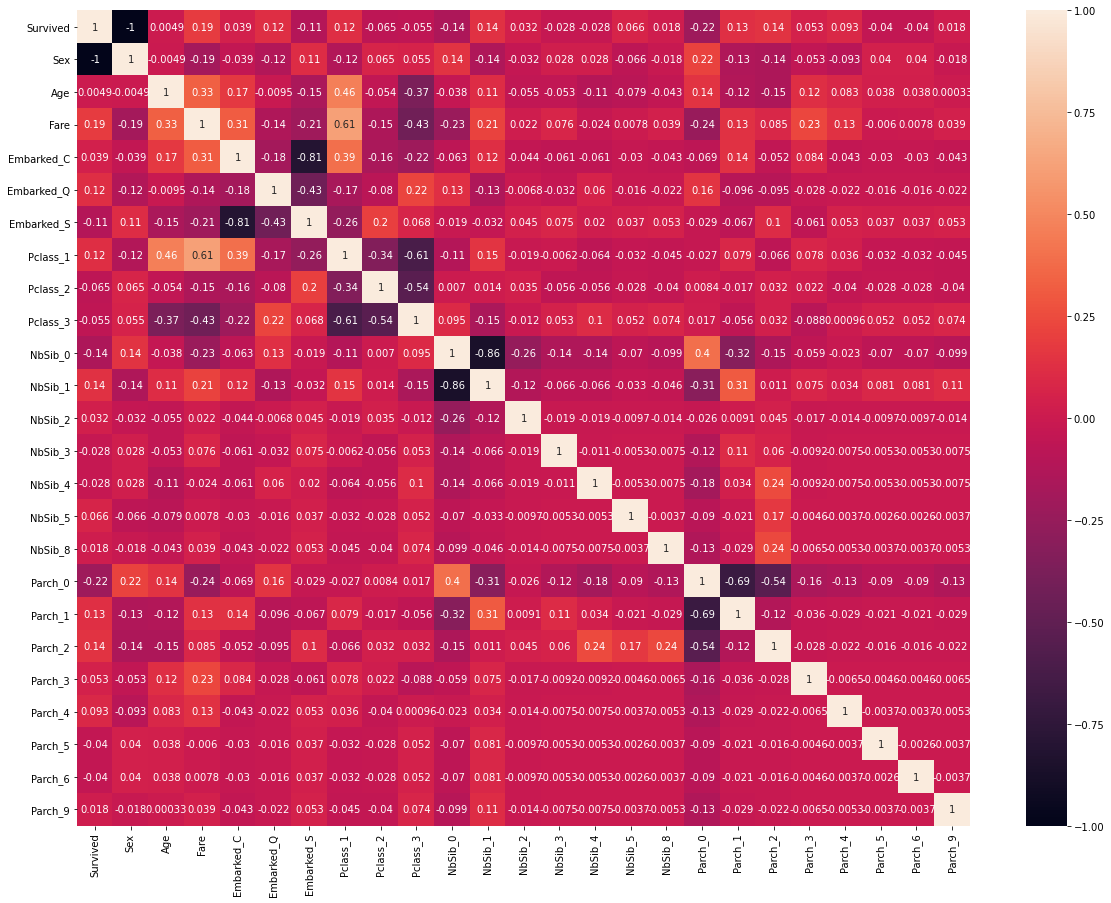

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(datafinal.corr(method='pearson'),annot=True)

In [ ]:
#Prediction
#Diviser les données en train et test

In [81]:
X = datafinal[["Sex","Age","Embarked_Q","Pclass_1","NbSib_1","Parch_0","Parch_1","Parch_2","Parch_3"]]
Y = datafinal["Survived"]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
print('Xr_train taille: ', Train_X.shape)
print('Xr_test taille: ', Test_X.shape)
print('yr_train taille: ', Train_Y.shape)
print('yr_test taille: ', Test_Y.shape)


Xr_train taille:  (303, 9)
Xr_test taille:  (76, 9)
yr_train taille:  (303,)
yr_test taille:  (76,)


In [82]:
model_lg= LogisticRegression(max_iter=1000)

# entrainer le modele sur les données d'entrainement X et y
model_lg.fit(Train_X,Train_Y)
# print(model_lg)

# faire la prédiction du modèle
pred_lg = model_lg.predict(Test_X)


print('-'*45+'\nMatrice de confusion du modèle : Régression Logistique'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_lg,Test_Y)}\n',
      '-'*45+'\nRapport de classification du modèle : Régression Logistique'+'\n'+'-'*45,
      f'\n{classification_report(pred_lg,Test_Y)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_lg,Test_Y)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_lg.score(Test_X, Test_Y)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_lg,Test_Y)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_lg,Test_Y)}\n')

---------------------------------------------
Matrice de confusion du modèle : Régression Logistique
--------------------------------------------- 
[[48  0]
 [ 0 28]]
 ---------------------------------------------
Rapport de classification du modèle : Régression Logistique
--------------------------------------------- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        28

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
1.0

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
1.0
 ---------------------------------------------
Valeur exact du Précision
--------------------------------------------- 
1.0

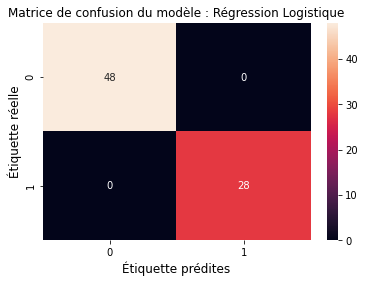

In [83]:
lg_confusion_matrix = confusion_matrix(pred_lg,Test_Y)
sns.heatmap(lg_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Régression Logistique', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

In [84]:
model_rf= RandomForestClassifier()

# entrainer le modele sur les données d'entrainement X et y
model_rf.fit(Train_X,Train_Y)
# print(model_lg)

# faire la prédiction du modèle
pred_rf = model_rf.predict(Test_X)


print('-'*45+'\nMatrice de confusion du modèle : Régression Logistique'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_rf,Test_Y)}\n',
      '-'*45+'\nRapport de classification du modèle : Régression Logistique'+'\n'+'-'*45,
      f'\n{classification_report(pred_rf,Test_Y)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_rf,Test_Y)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_lg.score(Test_X, Test_Y)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_rf,Test_Y)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_rf,Test_Y)}\n')

---------------------------------------------
Matrice de confusion du modèle : Régression Logistique
--------------------------------------------- 
[[48  0]
 [ 0 28]]
 ---------------------------------------------
Rapport de classification du modèle : Régression Logistique
--------------------------------------------- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        28

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
1.0

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
1.0
 ---------------------------------------------
Valeur exact du Précision
--------------------------------------------- 
1.0

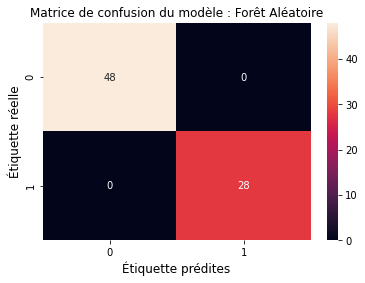

In [85]:
# matrice de confusion du Random Forest
rf_confusion_matrix = confusion_matrix(pred_rf,Test_Y)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Forêt Aléatoire', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()

In [86]:
model_dt = DecisionTreeClassifier(random_state=1)

# entrainer le modele sur les données d'entrainement X et y
model_dt.fit(Train_X,Train_Y)
# print(model_dt)

# faire la prédiction du modèle
pred_dt = model_dt.predict(Test_X)

print('-'*45+'\nMatrice de confusion du modèle : Arbre de Décision'+'\n'+'-'*45,
      f'\n{confusion_matrix(pred_dt,Test_Y)}\n',
      '-'*45+'\nRapport de classification du modèle : Arbre de Décision'+'\n'+'-'*45,
      f'\n{classification_report(pred_dt,Test_Y)}\n',
      '-'*45+'\nROC_AUC'+'\n'+'-'*45,
      f'\n{roc_auc_score(pred_dt,Test_Y)}\n\n',
      '-'*45+'\nValeur exact d\'Accuracy'+'\n'+'-'*45,
      f'\n{model_dt.score(Test_X, Test_Y)}\n',
      '-'*45+'\nValeur exact du Précision'+'\n'+'-'*45,
      f'\n{precision_score(pred_dt,Test_Y)}\n',
      '-'*45+'\nValeur exact du Recall'+'\n'+'-'*45,
      f'\n{recall_score(pred_dt,Test_Y)}\n')

---------------------------------------------
Matrice de confusion du modèle : Arbre de Décision
--------------------------------------------- 
[[48  0]
 [ 0 28]]
 ---------------------------------------------
Rapport de classification du modèle : Arbre de Décision
--------------------------------------------- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        28

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

 ---------------------------------------------
ROC_AUC
--------------------------------------------- 
1.0

 ---------------------------------------------
Valeur exact d'Accuracy
--------------------------------------------- 
1.0
 ---------------------------------------------
Valeur exact du Précision
--------------------------------------------- 
1.0
 ------

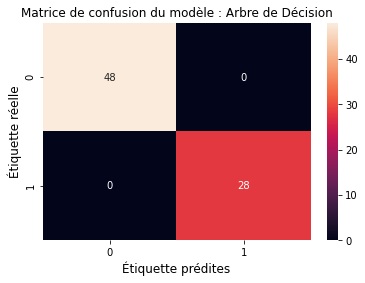

In [87]:
# matrice de confusion du Decision Tree Classifier
dt_confusion_matrix = confusion_matrix(pred_dt,Test_Y)
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d")

plt.title('Matrice de confusion du modèle : Arbre de Décision', fontsize=12)
plt.xlabel('Étiquette prédites', fontsize= 12)
plt.ylabel('Étiquette réelle', fontsize= 12)

plt.show()
